<a href="https://colab.research.google.com/github/mohankrishnas3/NLP-Libraries-Tutorial/blob/main/NLTK_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import tensorflow as tf
import nltk
from tqdm import tqdm

### Downloading all the modules of NLTK

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

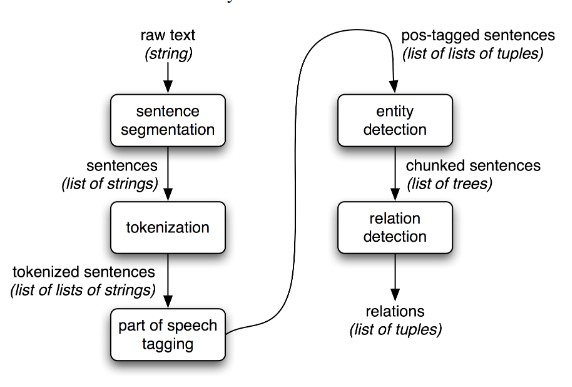

### Basic Tokenizers

In [ ]:
from nltk import sent_tokenize, word_tokenize

In [ ]:
example_text = "Hello, how are you. I am in Norfolk and its raining heavily. How is weather there?"

#### Sentence Tokenizer

In [ ]:
for sent in sent_tokenize(example_text):
  print(sent)

Hello, how are you.
I am in Norfolk and its raining heavily.
How is weather there?


#### Word Tokenizer

In [ ]:
for word in word_tokenize(example_text):
  print(word)

Hello
,
how
are
you
.
I
am
in
Norfolk
and
its
raining
heavily
.
How
is
weather
there
?


#### TreebankWordTokenizer

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer_wrd = TreebankWordTokenizer()
tokenizer_wrd.tokenize(example_text)

['Hello',
 ',',
 'how',
 'are',
 'you.',
 'I',
 'am',
 'in',
 'Norfolk',
 'and',
 'its',
 'raining',
 'heavily.',
 'How',
 'is',
 'weather',
 'there',
 '?']

####  WordPunctTokenizer

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize(" I can't allow you to go home early")) # word Punct tokenizer
print(word_tokenize(" I can't allow you to go home early")) # word tokenizer
print(tokenizer_wrd.tokenize("I can't allow you to go home early")) # Tree bank tokenizer

['I', 'can', "'", 't', 'allow', 'you', 'to', 'go', 'home', 'early']
['I', 'ca', "n't", 'allow', 'you', 'to', 'go', 'home', 'early']
['I', 'ca', "n't", 'allow', 'you', 'to', 'go', 'home', 'early']


#### RegexpTokenizer
https://docs.python.org/3/howto/regex.html

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
print(tokenizer.tokenize("won't is a  contraction."))
print(tokenizer.tokenize("can't is a contraction."))

["won't", 'is', 'a', 'contraction']
["can't", 'is', 'a', 'contraction']


#### Why to train own sentence tokenizer?

This is very important question that if we have NLTK’s default sentence tokenizer then why do we need to train a sentence tokenizer? The answer to this question lies in the quality of NLTK’s default sentence tokenizer. The NLTK’s default tokenizer is basically a general-purpose tokenizer. Although it works very well but it may not be a good choice for nonstandard text, that perhaps our text is, or for a text that is having a unique formatting. To tokenize such text and get best results, we should train our own sentence tokenizer.

### Stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
filtered_sentence = []

In [ ]:
for word in word_tokenize(example_text):
  if word not in stop_words:
    filtered_sentence.append(word)

In [ ]:
filtered_sentence

['Hello',
 ',',
 '.',
 'I',
 'Norfolk',
 'raining',
 'heavily',
 '.',
 'How',
 'weather',
 '?']

In [ ]:
#Same in Single Line

filtered_words = [word for word in word_tokenize(example_text) if not word in stop_words]

In [ ]:
filtered_words

['Hello',
 ',',
 '.',
 'I',
 'Norfolk',
 'raining',
 'heavily',
 '.',
 'How',
 'weather',
 '?']

### Frequency distribution

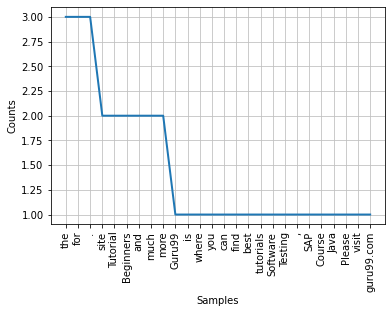

In [ ]:
import nltk
a = "Guru99 is the site where you can find the best tutorials for Software Testing     Tutorial, SAP Course for Beginners. Java Tutorial for Beginners and much more. Please     visit the site guru99.com and much more."
words = nltk.tokenize.word_tokenize(a)
fd = nltk.FreqDist(words)
fd.plot()

### Part of Speech Tagging
https://www.guru99.com/pos-tagging-chunking-nltk.html
</br>
https://www.nltk.org/book/ch07.html
</br>
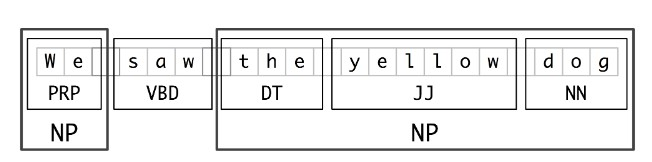

<!-- Abbreviation	Meaning</br>
CC	coordinating conjunction </br>
CD	cardinal digit</br>
DT	determiner</br>
EX	existential there</br>
FW	foreign word</br>
IN	preposition/subordinating conjunction</br>
JJ	This NLTK POS Tag is an adjective (large)</br>
JJR	adjective, comparative (larger)</br>
JJS	adjective, superlative (largest)</br>
LS	list market</br>
MD	modal (could, will)</br>
NN	noun, singular (cat, tree)</br>
NNS	noun plural (desks)</br>
NNP	proper noun, singular (sarah)</br>
NNPS	proper noun, plural (indians or americans)</br>
PDT	predeterminer (all, both, half)</br>
POS	possessive ending (parent\ ‘s)</br>
PRP	personal pronoun (hers, herself, him, himself)</br>
PRP$	possessive pronoun (her, his, mine, my, our )</br>
RB	adverb (occasionally, swiftly)</br>
RBR	adverb, comparative (greater)</br>
RBS	adverb, superlative (biggest)</br>
RP	particle (about)</br>
TO	infinite marker (to)</br>
UH	interjection (goodbye)</br>
VB	verb (ask)</br>
VBG	verb gerund (judging)</br>
VBD	verb past tense (pleaded)</br>
VBN	verb past participle (reunified)</br>
VBP	verb, present tense not 3rd person singular(wrap)</br>
VBZ	verb, present tense with 3rd person singular (bases)</br>
WDT	wh-determiner (that, what)</br>
WP	wh- pronoun (who)</br>
WRB	wh- adverb (how)</br> -->

In [ ]:
text = "Computers don't speak English. So, we've to learn C, C++, Java, Python and the like! Yay!"
import nltk
from nltk.tokenize import word_tokenize

words = word_tokenize(text)
pos_tagged_text = nltk.pos_tag(words)
print(pos_tagged_text)

[('Computers', 'NNS'), ('do', 'VBP'), ("n't", 'RB'), ('speak', 'VB'), ('English', 'NNP'), ('.', '.'), ('So', 'RB'), (',', ','), ('we', 'PRP'), ("'ve", 'VBP'), ('to', 'TO'), ('learn', 'VB'), ('C', 'NNP'), (',', ','), ('C++', 'NNP'), (',', ','), ('Java', 'NNP'), (',', ','), ('Python', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('like', 'JJ'), ('!', '.'), ('Yay', 'NN'), ('!', '.')]


In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
for pos_tag_word in pos_tagged_text:
    print(pos_tag_word[0], ":")
    nltk.help.upenn_tagset(pos_tag_word[1])

Computers :
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
do :
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...
n't :
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
speak :
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
English :
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
 

### Chunking 
https://www.nltk.org/book/ch07.html

Chunking (aka. Shallow parsing) is to analyzing a sentence to identify the constituents (noun groups, verbs, verb groups, etc.). However, it does not specify their internal structure, nor their role in the main sentence.



In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

sentence = [("The", "DT"), ("small", "JJ"), ("red", "JJ"),("flower", "NN"), 
("flew", "VBD"), ("through", "IN"),  ("the", "DT"), ("window", "NN")]
grammar = "mychunk: {<NNS.?>*<PRP.?>*<VBD?>}" 
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence) 
print(result)

(S
  The/DT
  small/JJ
  red/JJ
  flower/NN
  (mychunk flew/VBD)
  through/IN
  the/DT
  window/NN)


In [ ]:
#import the library
import nltk
#define the text
sentence = "I told the children I was going to tell them a story. They were excited"
#tokenize the text
tokens = nltk.word_tokenize(sentence)
#perform POS tagging
tags = nltk.pos_tag(tokens)
#define a chunk grammar named mychunk
chunk_grammar = """ mychunk: {<NNS.?>*<PRP.?>*<VBD?>}"""
#change grammer then chunking will change. Change PRP to CC or VB or NN or JJ to check.
#parse the grammar with regular expression parser
parser = nltk.RegexpParser(chunk_grammar)
#assign the chunk
tree = parser.parse(tags)
print(tree)

(S
  (mychunk I/PRP told/VBD)
  the/DT
  (mychunk children/NNS I/PRP was/VBD)
  going/VBG
  to/TO
  (mychunk tell/VB)
  them/PRP
  a/DT
  story/NN
  ./.
  (mychunk They/PRP were/VBD)
  excited/VBN)


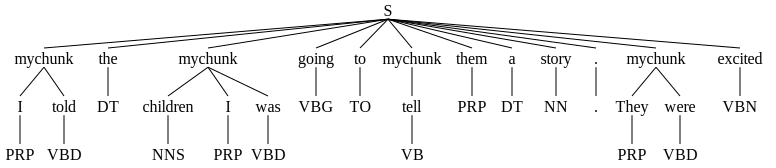

In [ ]:
display(tree)

###Chinking

In [ ]:
#import the library
import nltk
#define the text
sentence = "I told the children I was going to tell them a story. They were excited"
#tokenize the text
tokens = nltk.word_tokenize(sentence)
#perform POS tagging
tags = nltk.pos_tag(tokens)
#define a chunk grammar named mychunk
chunk_grammar = """ mychunk: {<PRP.?>}"""

#parse the grammar with regular expression parser
parser = nltk.RegexpParser(chunk_grammar)
#assign the chunk
tree = parser.parse(tags)
print(tree)

(S
  (mychunk I/PRP)
  told/VBD
  the/DT
  children/NNS
  (mychunk I/PRP)
  was/VBD
  going/VBG
  to/TO
  tell/VB
  (mychunk them/PRP)
  a/DT
  story/NN
  ./.
  (mychunk They/PRP)
  were/VBD
  excited/VBN)


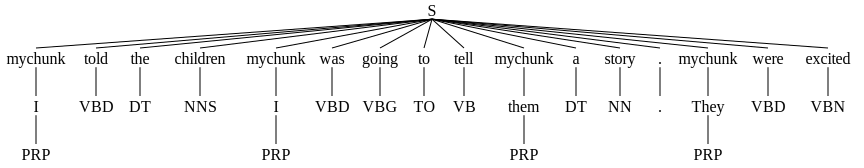

In [ ]:
display(tree)

### Named Entity Recognition
</br>



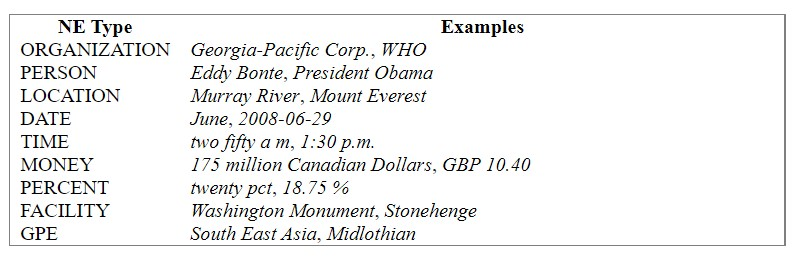

In [ ]:
import nltk
from nltk import word_tokenize,pos_tag

text = "NASA awarded Elon Musk’s SpaceX a $2.9 billion contract to build the lunar lander."
tokens = word_tokenize(text)
tag=pos_tag(tokens)
print(tag)

ne_tree = nltk.ne_chunk(tag)
print(ne_tree)

[('NASA', 'NNP'), ('awarded', 'VBD'), ('Elon', 'NNP'), ('Musk', 'NNP'), ('’', 'NNP'), ('s', 'VBD'), ('SpaceX', 'NNP'), ('a', 'DT'), ('$', '$'), ('2.9', 'CD'), ('billion', 'CD'), ('contract', 'NN'), ('to', 'TO'), ('build', 'VB'), ('the', 'DT'), ('lunar', 'NN'), ('lander', 'NN'), ('.', '.')]
(S
  (ORGANIZATION NASA/NNP)
  awarded/VBD
  (PERSON Elon/NNP Musk/NNP)
  ’/NNP
  s/VBD
  (ORGANIZATION SpaceX/NNP)
  a/DT
  $/$
  2.9/CD
  billion/CD
  contract/NN
  to/TO
  build/VB
  the/DT
  lunar/NN
  lander/NN
  ./.)


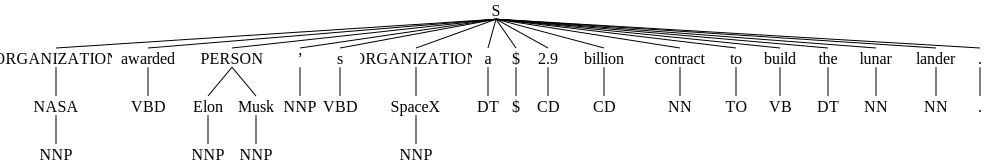

In [ ]:
display(ne_tree)

##Relation Extraction

In [ ]:
from nltk.corpus import ieer
 	
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
     for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,
                                      corpus='ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


### Wordnet

Wordnet is a large lexical database of English, which was created by Princeton. It is a part of the NLTK corpus. Nouns, verbs, adjectives and adverbs all are grouped into set of synsets, i.e. cognitive synonyms.
The main concept of the relationship between the words in the WordNETs network is that the words are synonyms like sad and unhappy, benefit and profit. These words show the same concept of using them in similar contexts by interchanging them. These types of words are grouped into synsets which are unordered sets. Where synsets are linked together if they are having even small conceptual relations. Every synset in the network has its own brief definition and many of them are illustrated with the example of how to use them in a sentence.
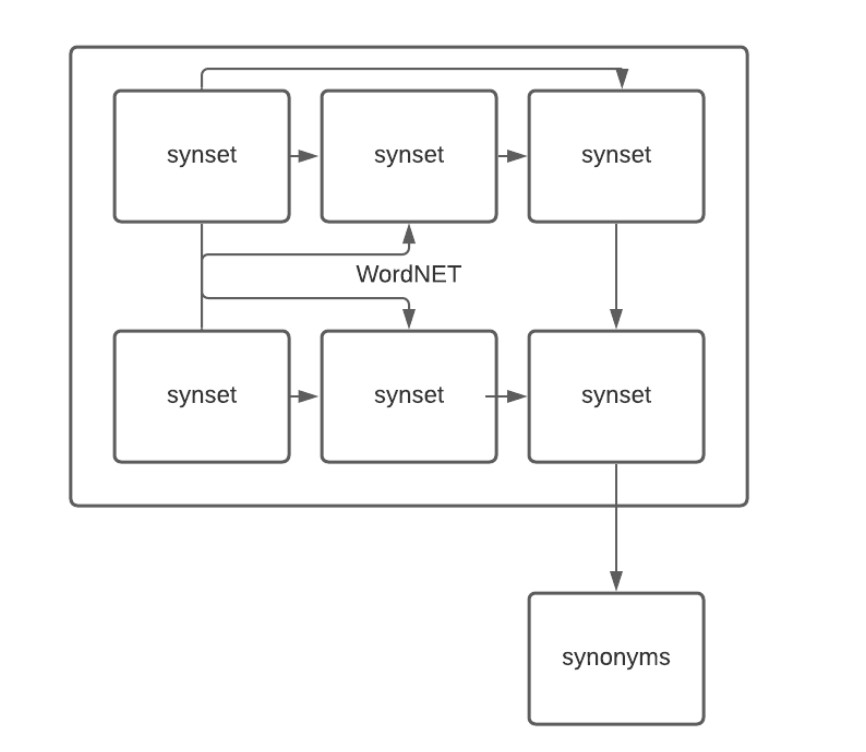

In [ ]:
from nltk.corpus import wordnet

In [ ]:
for i in wordnet.synsets("plan"):
  print(i,":",i.definition(),"\n","Example:",i.examples())
  print("---"*30)

Synset('plan.n.01') : a series of steps to be carried out or goals to be accomplished 
 Example: ['they drew up a six-step plan', 'they discussed plans for a new bond issue']
------------------------------------------------------------------------------------------
Synset('design.n.02') : an arrangement scheme 
 Example: ['the awkward design of the keyboard made operation difficult', 'it was an excellent design for living', 'a plan for seating guests']
------------------------------------------------------------------------------------------
Synset('plan.n.03') : scale drawing of a structure 
 Example: ['the plans for City Hall were on file']
------------------------------------------------------------------------------------------
Synset('plan.v.01') : have the will and intention to carry out some action 
 Example: ['He plans to be in graduate school next year', 'The rebels had planned turmoil and confusion']
----------------------------------------------------------------------------

In [ ]:
w3 = wordnet.synsets('dog')
w3

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [ ]:
w3[0].definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [ ]:
wordnet.synsets('dog', pos=wordnet.VERB)

[Synset('chase.v.01')]

In [ ]:
wordnet.synsets('dog', pos=wordnet.VERB)[0].definition()

'go after with the intent to catch'

###Getting Text to Analyze

NLTK provides several corpora covering everything from novels hosted to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, you first need to import them. This requires nltk.download("book"), which is a pretty big download

In [ ]:
nltk.download("book")
from nltk.book import *
# *** Introductory Examples for the NLTK Book ***
# Loading text1, ..., text9 and sent1, ..., sent9
# Type the name of the text or sentence to view it.
# Type: 'texts()' or 'sents()' to list the materials.
# text1: Moby Dick by Herman Melville 1851
# text2: Sense and Sensibility by Jane Austen 1811
# text3: The Book of Genesis
# text4: Inaugural Address Corpus
# text5: Chat Corpus
# text6: Monty Python and the Holy Grail
# text7: Wall Street Journal
# text8: Personals Corpus
# text9: The Man Who Was Thursday by G . K . Chesterton 1908

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

When you use a concordance, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.

In [ ]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


### Similarity

In [ ]:
w1 = wordnet.synset("ship.n.01")
w2 = wordnet.synset("boat.n.01")

In [ ]:
print(w1.definition())

a vessel that carries passengers or freight


In [ ]:
str(w1.wup_similarity(w2)*100)+" % Similar"

'90.9090909090909 % Similar'

In [ ]:
w1 = wordnet.synset("ship.n.01")
w2 = wordnet.synset("car.n.01")

In [ ]:
str(w1.wup_similarity(w2)*100)+" % Similar"

'69.56521739130434 % Similar'

### Finding Synonyms
By using the lemma() method, we can find the number of synonyms of a Synset. Let us apply this method on ‘dog’ synset −

In [ ]:
from nltk.corpus import wordnet as wn
syn = wn.synsets('dog')[0]
lemmas = syn.lemmas()
len(lemmas)

3

In [ ]:
for i in lemmas:
  print(i.name())

dog
domestic_dog
Canis_familiaris


### Finding Antonyms
In WordNet, some lemmas also have antonyms. For example, the word ‘good ‘has a total of 27 synets, among them, 5 have lemmas with antonyms. Let us find the antonyms (when the word ‘good’ used as noun and when the word ‘good’ used as adjective).

In [ ]:
from nltk.corpus import wordnet as wn
syn1 = wn.synset('good.n.02')
antonym1 = syn1.lemmas()[0].antonyms()[0]
antonym1.name()

'evil'

<!-- ### Word replacement using regular expression -->


In [ ]:
# #@title
# import re
# from nltk.corpus import wordnet
# #@title
# tweet = "am ok, I can't do this"
# print(tweet)
# #@title
# regxDict = {"can\'t": "cannot", 
#             "won\'t": "will not",
#             "am": "I am",
#             }
#             #@title
# # for i in regxDict:
# #   print(i, regxDict[i])
  
# #@title
# def regx(tweet):

#   for i in regxDict:
#     exp = i

#     tweet = re.sub(exp, regxDict[i], tweet)

#   return tweet

# #@title
# regx(tweet)

### Sentiment analysis

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# sia.polarity_scores("Wow, NLTK is really powerful!")
sia.polarity_scores("I am not happy")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4585}

### Stemming and lemmatization
both stemming and lemmatization is the same: to reduce a word to its most native form
but Stemming uses a simple mechanism that removes or modifies inflections to form the root word, but the root word may not be a valid word in the language while Lemmatization also removes or modifies the inflections to form the root word, but the root word is a valid word in the language.

####Stemming

In [ ]:
import nltk
stemmer = nltk.stem.PorterStemmer()
word = "building"
print("Stem of", word, stemmer.stem(word))

Stem of building build


Lemmatization

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
word = "building"
pos = 'n';
print("Lemmatization of", word, "(" , pos, "):", lemmatizer.lemmatize(word, pos))
pos = 'v';
print("Lemmatization of", word, "(" , pos, "):", lemmatizer.lemmatize(word, pos))

Lemmatization of building ( n ): building
Lemmatization of building ( v ): build


### Keyword extraction with nltk

In [ ]:
!pip install rake_nltk
!pip install punkt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt


In [ ]:
import nltk
nltk.download('stopwords')
from rake_nltk import Rake
rake_nltk_var = Rake()
text = """spaCy is an open-source software library for advanced natural language processing,
written in the programming languages Python and Cython. The library is published under the MIT license
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

['advanced natural language processing', 'software company explosion', 'programming languages python', 'source software library', 'mit license', 'matthew honnibal', 'main developers', 'ines montani', 'library', 'written', 'spacy', 'published', 'open', 'founders', 'cython']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Summarization using NLTK

In [ ]:
!pip install beautifulsoup4
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import bs4 as bs
import urllib.request
import re

scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scraped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [ ]:
#preprocessing
# Removing Square Brackets and Extra Spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

In [ ]:
# Removing special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [ ]:
#Converting Text To Sentences
sentence_list = nltk.sent_tokenize(article_text)

we loop through all the sentences and then corresponding words to first check if they are stop words. If not, we proceed to check whether the words exist in word_frequency dictionary i.e. word_frequencies, or not. If the word is encountered for the first time, it is added to the dictionary as a key and its value is set to 1. Otherwise, if the word previously exists in the dictionary, its value is simply updated by 1.

In [ ]:

stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

we can simply divide the number of occurances of all the words by the frequency of the most occurring word, as shown below:

In [ ]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

calculate the scores for each sentence by adding weighted frequencies of the words that occur in that particular sentence
1. each sentence in the sentence_list and tokenize the sentence into words.
2. check if the word exists in the word_frequencies dictionary to check whether it is stop word or not
3. calculate the score for only sentences with less than 30 words
4. check whether the sentence exists in the sentence_scores dictionary or not. If the sentence doesn't exist, we add it to the sentence_scores dictionary as a key and assign it the weighted frequency of the first word in the sentence, as its value.
5. if the sentence exists in the dictionary, we simply add the weighted frequency of the word to the existing value

In [ ]:
#sentence score
sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

since sentence_scores dictionary that contains sentences with their corresponding score to summarize the article, we can take top N sentences with the highest scores

In [ ]:
import heapq
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by animals and humans. The artificial intelligence algorithms will also be used to further improve diagnosis over time, via an application of machine learning called precision medicine. A machine with general intelligence can solve a wide variety of problems with breadth and versatility similar to human intelligence. Deep learning has drastically improved the performance of programs in many important subfields of artificial intelligence, including computer vision, speech recognition, image classification and others. AI founder John McCarthy agreed, writing that "Artificial intelligence is not, by definition, simulation of human intelligence". A superintelligence, hyperintelligence, or superhuman intelligence, is a hypothetical agent that would possess intelligence far surpassing that of the brightest and most gifted human mind. The main agenda for these scientific di